<a href="https://colab.research.google.com/github/kim-spirit/aipython/blob/main/240607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#훈련데이터와 테스트 데이터를 따로 했기 때문에 서로 잘 맞는지 확인해줘야 함. 피피티에 있는 것은 분리시켜서 같이 확인 가능함.
#생존을 예측하고자 함 -> survived는 목표 변수
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#전처리할 때, 결측치 반드시 알아봐야 함, 결측치 채울 것
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#0은 사망, 1은 생존
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#결측치 채우기
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median()) #inplace = True로 써도 되지만, 오류 때문에 앞에 = 버전으로 함. 오류나면 서로 번갈아가면서 하기
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [14]:
#범주형 데이터 머신 러닝 처리에 부적합 -> 별도의 컬럼으로 빼줌(0,1 - T,F)로 나뉘게 = 데이터 인코딩
#성별과 embarked 컬럼이 T/F로 바뀜
#데이터 전처리 과정
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'])

train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [15]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,False,True,False,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,False,True,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True


In [20]:
#axis = 1은 열을 없앰
#데이터 전처리에서 결측값 처리가 가장 중요
train_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace = True)
test_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace = True)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

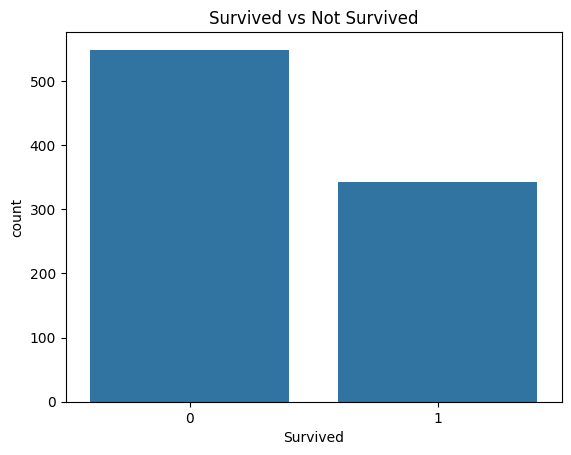

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= 'Survived', data = train_data)
plt.title('Survived vs Not Survived')
plt.show()

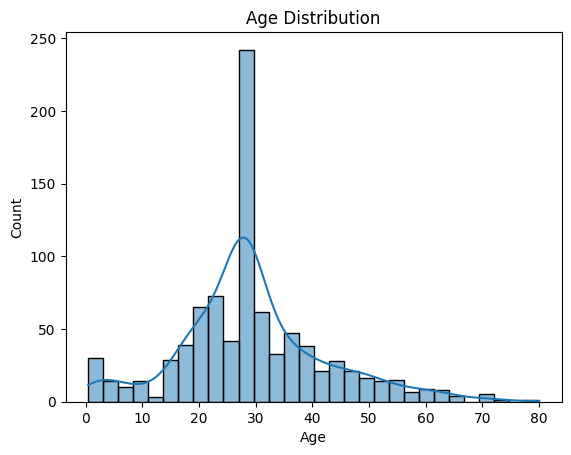

In [27]:
sns.histplot(x = 'Age', bins = 30, kde = True, data = train_data) #train_data['Age]도 가능
plt.title('Age Distribution')
plt.show()

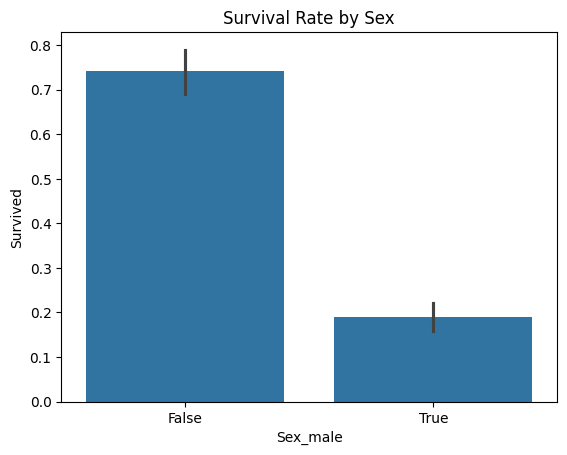

In [28]:
sns.barplot(x = 'Sex_male', y = 'Survived', data = train_data)
plt.title('Survival Rate by Sex')
plt.show()

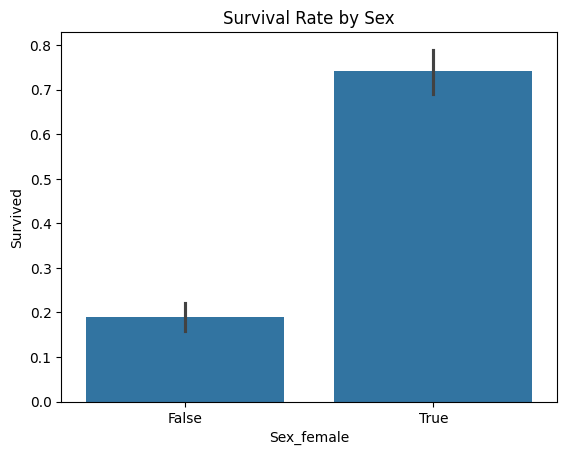

In [29]:
sns.barplot(x = 'Sex_female', y = 'Survived', data = train_data)
plt.title('Survival Rate by Sex')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

x = train_data.drop('Survived', axis =1) #train data에서 목표 변수를 드랍 -> 목표 변수를 예측해야하므로, 목표 변수를 뻄
y = train_data['Survived'] #목표값으로 데이터셋을 만듦 -> 목표 변수를 구하기 위해 목표 변수만 칼럼에 넣음

X_train, X_val,y_train,y_val =train_test_split(x,y,test_size=0.2,random_state=42) #일반적으로 8 : 2, 대소문자 구분 잘하기

In [37]:
from sklearn.tree import DecisionTreeClassifier #디시전트리 사용
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train) #모델 훈련
y_pred = clf.predict(X_val) #예측하라는 뜻



In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred) #정확도
print(f'Accuracy : {accuracy}')

conf_matrix = confusion_matrix(y_val, y_pred) #혼동 행렬 -> 1-1 생존 ㅇ, 생존 예측 ㅇ 1-2 생존 ㅇ, 생존 예측 x, 2-1 사망, 사망 예측 ㅇ, 2-2 사망 ㅇ, 사망 예측 x
print('Confusion Matrix: ')
print(conf_matrix)

class_report = classification_report(y_val, y_pred) #정확도 등을 모아둔 보고서
print('classification_report: ')
print(class_report)

Accuracy : 0.776536312849162
Confusion Matrix: 
[[83 22]
 [18 56]]
classification_report: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



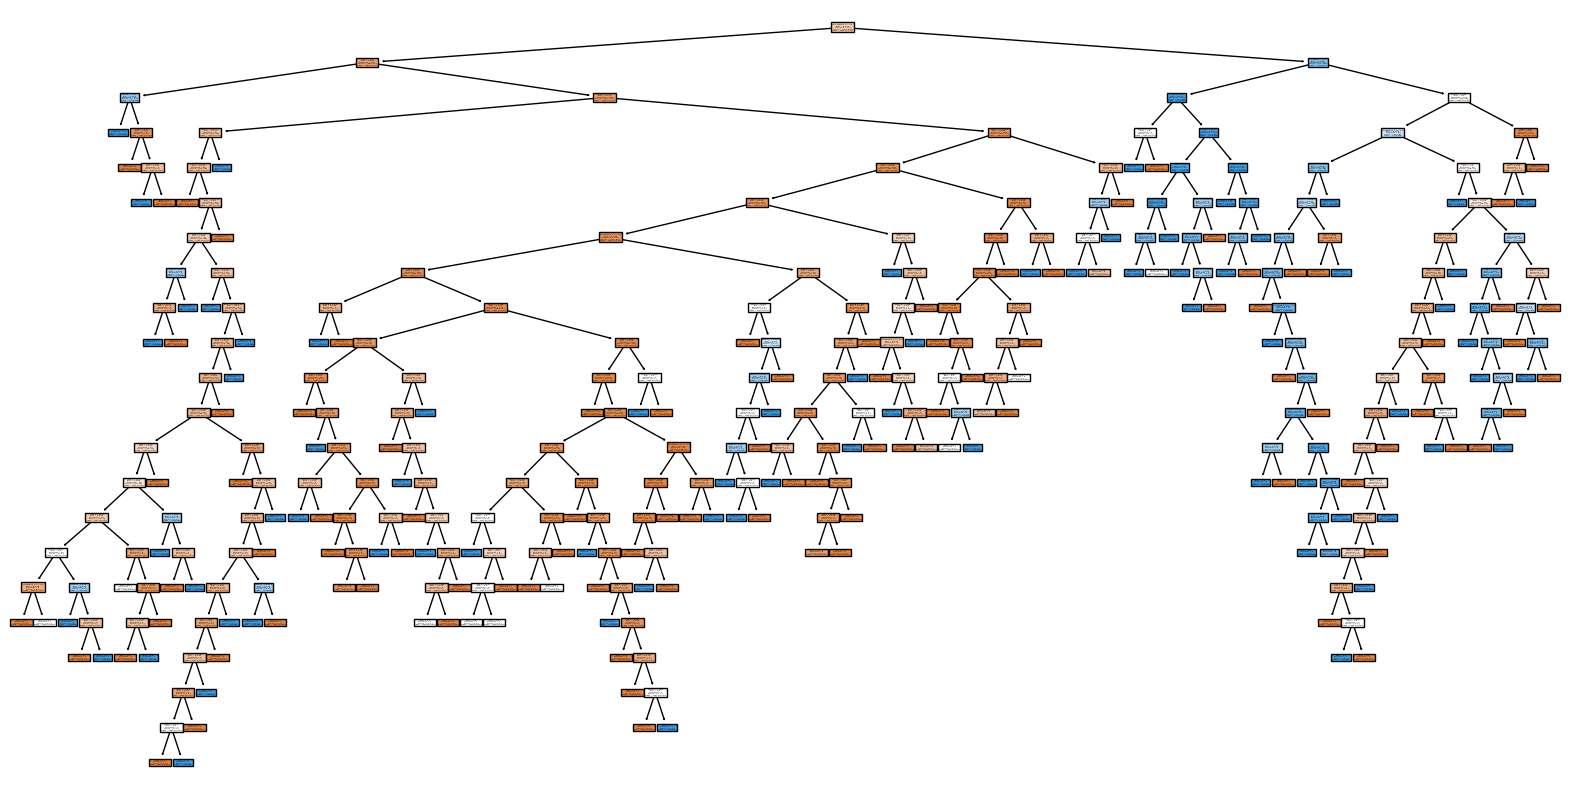

In [45]:
#시각화
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(clf, filled = True, feature_names = x.columns, class_names = ['Not Survied', 'Survived']) #위에 train_test_split에서 (x,y)로 적어서 x.columns가 됨 -> 대소문자 구분 잘할 것
plt.show()